# You need to build a model that can differentiate between comments and its categories.  
Refer to the data set file provided along with this. 


In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [78]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
from keras.preprocessing.text import Tokenizer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [79]:
dftest=pd.read_csv('test.csv')
dftrain=pd.read_csv('train.csv')

In [80]:
dftest

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing but too-long-crap"
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n Does it get there faster by throwing to cut off man or direct from out fielder? \n Were the out fielders in the Mickey mantle era have better arms? \n Rich
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is """"more correct."""" I had gotten confused, but then found this: \n :... while acknowledging Japan's territorial rights to Okinotorishima itself ... \n However, is there a category for \n :... did not acknowledge Japan's claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for """"disputed EEZ""""s? """
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the EU - Germany - has a Law of Return quite similar to Israel's"""" == \n\n This isn't actually true, is it? Germany allows people whose ancestors were citizens of Germany to return, but AFAIK it does not allow the descendants of Anglo-Saxons to """"return"""" to Angeln and Saxony. Israel, by contrast, allows all Jews to """"return"""" to Israel, even if they can't trace a particular ancestral line to anyone who lived in the modern state or even mandate Palestine. — """


In [81]:
dftrain

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0


In [83]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
dftrain.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#types of comments
NumericData=dftrain.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 6
Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')


In [36]:
NumericDataMelt=NumericData.melt()

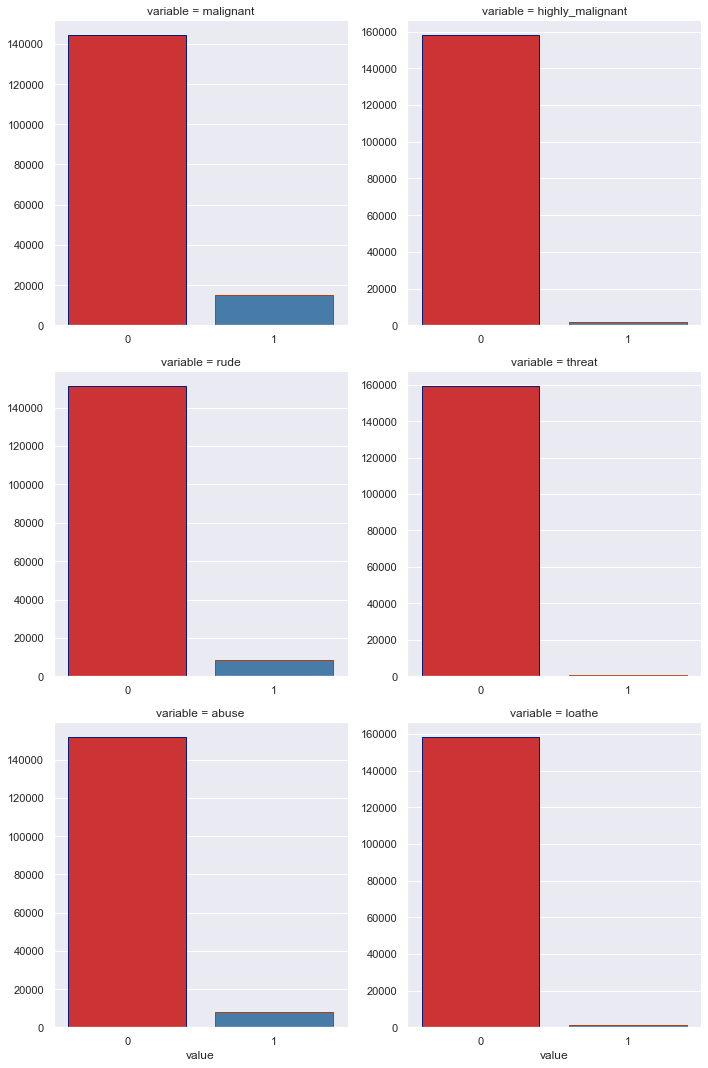

In [118]:
CatFacetGrid = sns.FacetGrid(NumericDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=5,col_wrap=2)
#CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value',palette="Set1",edgecolor=sns.color_palette("dark", 3))
plt.show()

In [61]:
for col in dftrain.columns:
    if dftrain[col].dtype=="int64":
        print(dftrain[col].value_counts())
        print()

0    144277
1     15294
Name: malignant, dtype: int64

0    157976
1      1595
Name: highly_malignant, dtype: int64

0    151122
1      8449
Name: rude, dtype: int64

0    159093
1       478
Name: threat, dtype: int64

0    151694
1      7877
Name: abuse, dtype: int64

0    158166
1      1405
Name: loathe, dtype: int64



In [56]:
print ('Threats online','\n',dftrain.threat.value_counts())

Threats online 
 0    159093
1       478
Name: threat, dtype: int64


In [20]:
labels=NumericData.sum()

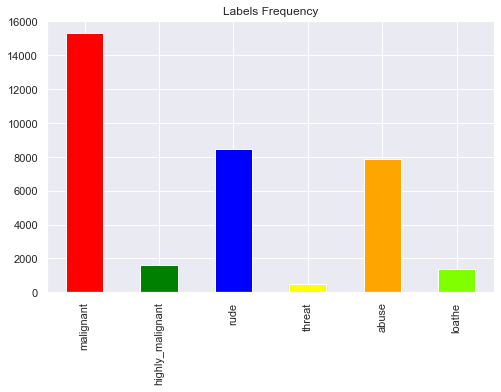

In [100]:
plt.figure(figsize=(8,5))
labels.plot(kind='bar', title='Labels Frequency', color = ['red','green','blue','yellow','orange','chartreuse'] )
sns.set_theme(style="darkgrid")

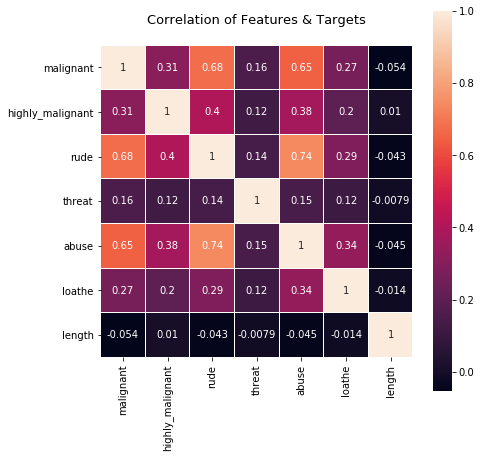

In [41]:
plt.figure(figsize=(7,7))
plt.title('Correlation of Features & Targets',y=1.05,size=13)
sns.heatmap(dftrain.corr(),linewidths=0.2,vmax=1.0,square=True,annot=True)
plt.show()

In [95]:
df2 = dftrain[dftrain.isna().any(axis=1)]
df2

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe


In [84]:
#New column for Length of message
dftrain['length'] = dftrain.comment_text.str.len()
dftrain.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67


In [85]:
dftrain['comment_text'].shape[0]

159571

average length of comment: 394.139


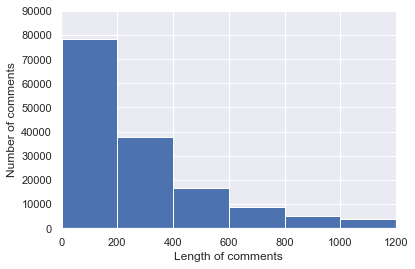

In [116]:
x = [len(dftrain['comment_text'][i]) for i in range(dftrain['comment_text'].shape[0])]
print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
plt.hist(x,bins = [1,200,400,600,800,1000,1200])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.show()

In [86]:
dftrain['comment_text'] = dftrain['comment_text'].str.lower()

In [87]:
# Replace email addresses with 'email'
dftrain['comment_text']  = dftrain['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

# Replace numbers with 'number'
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
dftrain['comment_text'] =dftrain['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
dftrain['comment_text'] = dftrain['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [88]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

dftrain['comment_text'] = dftrain['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [10]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()

In [89]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

dftrain['comment_text'] = dftrain['comment_text'].apply(stemming)
dftrain.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explan edit made usernam hardcor metallica fan revert vandal closur gas vote new york doll fac pleas remov templat talk page sinc retir number number,0,0,0,0,0,0,264
1,000103f0d9cfb60f,aww match background colour seem stuck thank talk number number januari number number utc,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man realli tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good_article_nomin transport,0,0,0,0,0,0,622
4,0001d958c54c6e35,sir hero chanc rememb page,0,0,0,0,0,0,67


for i in range(len(dftrain['comment_text'])):
    #dftrain['comment_text'][i]=dftrain['comment_text'][i].lower()
    l = []
    for word in dftrain['comment_text'][i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    dftrain['comment_text'][i] = " ".join(l)

In [11]:
#dftrain = dftrain.reindex(np.random.permutation(dftrain.index))

In [91]:
comment = dftrain['comment_text']
print(comment.head())
#comment = comment.to_numpy()

0    explan edit made usernam hardcor metallica fan revert vandal closur gas vote new york doll fac pleas remov templat talk page sinc retir number number                                                                                                                                                                  
1    aww match background colour seem stuck thank talk number number januari number number utc                                                                                                                                                                                                                              
2    hey man realli tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info                                                                                                                                                                                                   
3    make real suggest improv wonder section stat

In [92]:
dftrain

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explan edit made usernam hardcor metallica fan revert vandal closur gas vote new york doll fac pleas remov templat talk page sinc retir number number,0,0,0,0,0,0,264
1,000103f0d9cfb60f,aww match background colour seem stuck thank talk number number januari number number utc,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man realli tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good_article_nomin transport,0,0,0,0,0,0,622
4,0001d958c54c6e35,sir hero chanc rememb page,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view complet contradict coverag reliabl sourc anyon care feel even give consist argument open suppos mention signific aspect signific one,0,0,0,0,0,0,295
159567,ffea4adeee384e90,asham horribl thing put talk page number number,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring crunch captain,0,0,0,0,0,0,81
159569,fff125370e4aaaf3,look like actual put speedi first version delet look,0,0,0,0,0,0,116


In [93]:
dftrain['cleancomment_length'] = dftrain.comment_text.str.len()
dftrain

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,cleancomment_length
0,0000997932d777bf,explan edit made usernam hardcor metallica fan revert vandal closur gas vote new york doll fac pleas remov templat talk page sinc retir number number,0,0,0,0,0,0,264,149
1,000103f0d9cfb60f,aww match background colour seem stuck thank talk number number januari number number utc,0,0,0,0,0,0,112,89
2,000113f07ec002fd,hey man realli tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233,116
3,0001b41b1c6bb37e,make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good_article_nomin transport,0,0,0,0,0,0,622,311
4,0001d958c54c6e35,sir hero chanc rememb page,0,0,0,0,0,0,67,26
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view complet contradict coverag reliabl sourc anyon care feel even give consist argument open suppos mention signific aspect signific one,0,0,0,0,0,0,295,153
159567,ffea4adeee384e90,asham horribl thing put talk page number number,0,0,0,0,0,0,99,47
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring crunch captain,0,0,0,0,0,0,81,61
159569,fff125370e4aaaf3,look like actual put speedi first version delet look,0,0,0,0,0,0,116,52


In [94]:
dftrain

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,cleancomment_length
0,0000997932d777bf,explan edit made usernam hardcor metallica fan revert vandal closur gas vote new york doll fac pleas remov templat talk page sinc retir number number,0,0,0,0,0,0,264,149
1,000103f0d9cfb60f,aww match background colour seem stuck thank talk number number januari number number utc,0,0,0,0,0,0,112,89
2,000113f07ec002fd,hey man realli tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233,116
3,0001b41b1c6bb37e,make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good_article_nomin transport,0,0,0,0,0,0,622,311
4,0001d958c54c6e35,sir hero chanc rememb page,0,0,0,0,0,0,67,26
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view complet contradict coverag reliabl sourc anyon care feel even give consist argument open suppos mention signific aspect signific one,0,0,0,0,0,0,295,153
159567,ffea4adeee384e90,asham horribl thing put talk page number number,0,0,0,0,0,0,99,47
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring crunch captain,0,0,0,0,0,0,81,61
159569,fff125370e4aaaf3,look like actual put speedi first version delet look,0,0,0,0,0,0,116,52


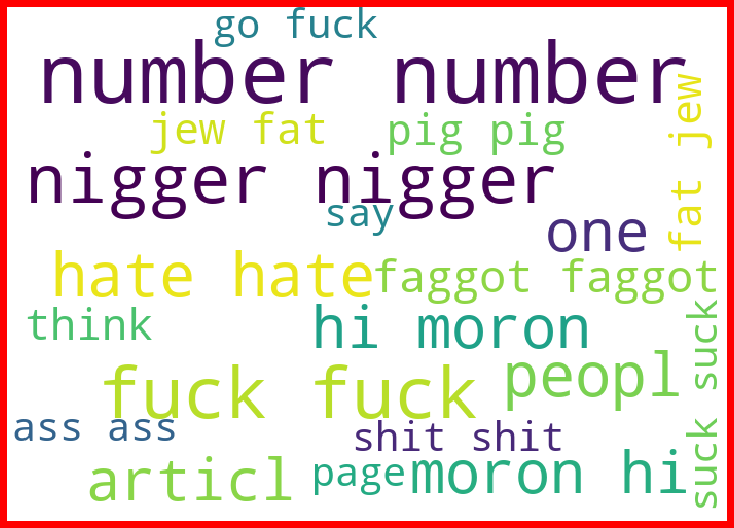

In [95]:
 #Getting sense of cloud words in spam 
from wordcloud import WordCloud


spams = dftrain['comment_text'][dftrain['malignant']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

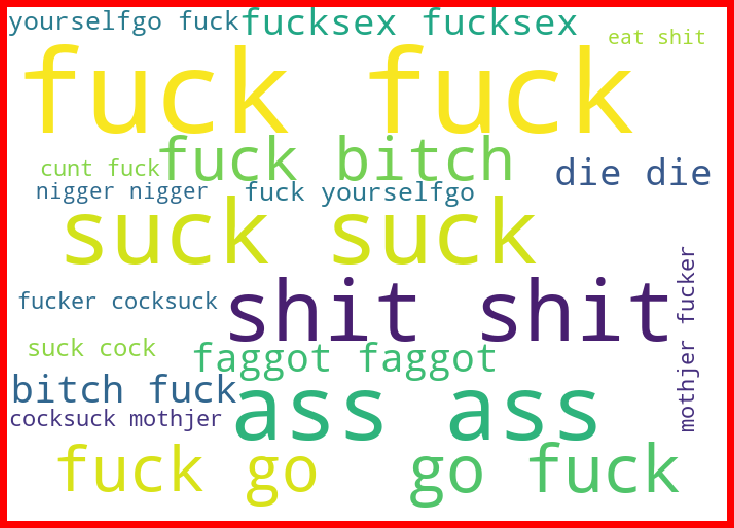

In [96]:
 #Getting sense of cloud words in spam 
from wordcloud import WordCloud


spams = dftrain['comment_text'][dftrain['highly_malignant']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

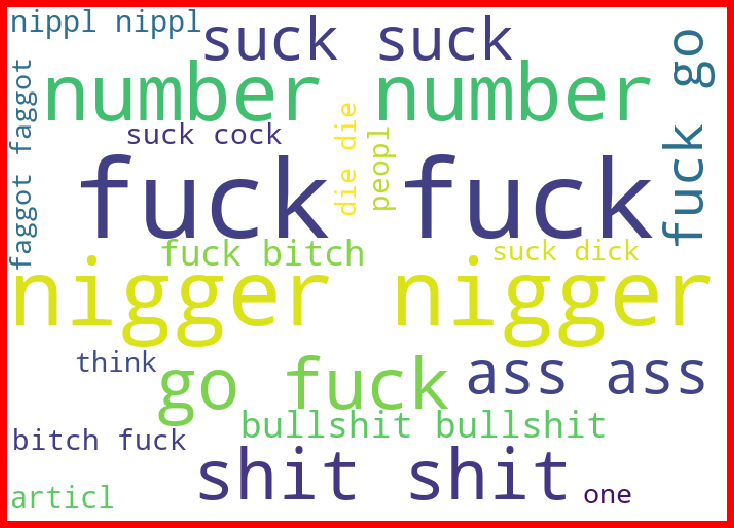

In [97]:
 #Getting sense of cloud words in spam 
from wordcloud import WordCloud


spams = dftrain['comment_text'][dftrain['rude']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

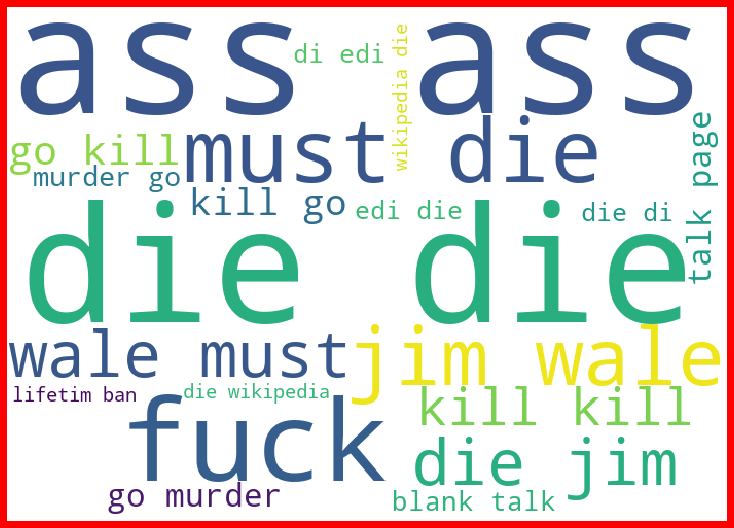

In [98]:
 #Getting sense of cloud words in spam 
from wordcloud import WordCloud


spams = dftrain['comment_text'][dftrain['threat']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

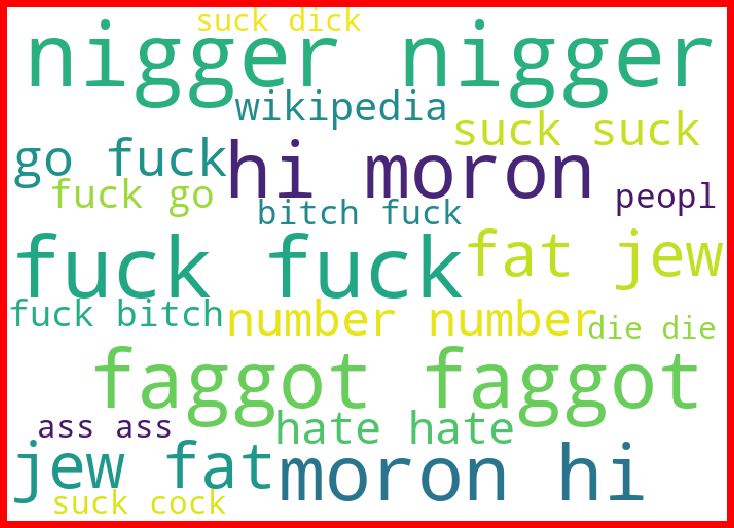

In [99]:
 #Getting sense of cloud words in spam 
from wordcloud import WordCloud


spams = dftrain['comment_text'][dftrain['abuse']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

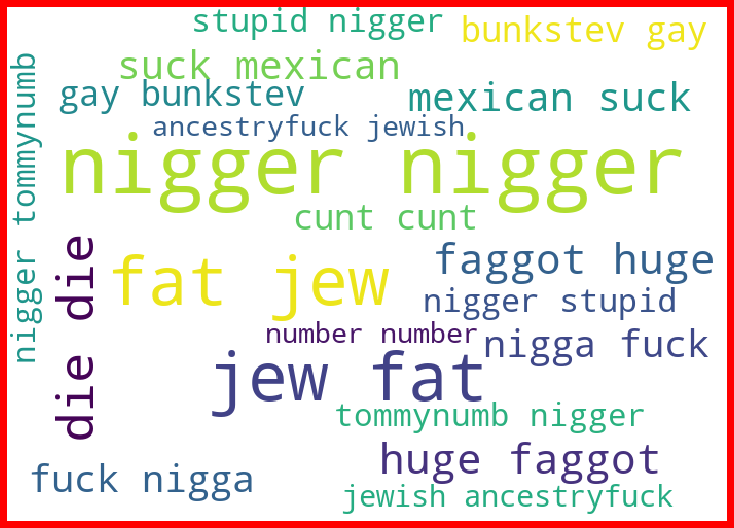

In [100]:
 #Getting sense of cloud words in spam 
from wordcloud import WordCloud


spams = dftrain['comment_text'][dftrain['loathe']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [101]:
malign = " ".join(dftrain[dftrain['malignant'] == 1]['comment_text'].tolist())
non_malign = " ".join(dftrain[dftrain['malignant'] == 0]['comment_text'].tolist())

# Finding most repeated words in the messages
def return_top_words(message,words = 10):
    allWords = nltk.tokenize.word_tokenize(message)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

top_10_malign = return_top_words(malign,10)
top_10_non_malign = return_top_words(non_malign,10)
print(top_10_malign)
print(top_10_non_malign)

['fuck', 'number', 'suck', 'go', 'like', 'wikipedia', 'shit', 'nigger', 'ass', 'hate']
['number', 'articl', 'page', 'wikipedia', 'edit', 'talk', 'use', 'one', 'pleas', 'like']


In [102]:
highmalign = " ".join(dftrain[dftrain['highly_malignant'] == 1]['comment_text'].tolist())
non_highmalign = " ".join(dftrain[dftrain['highly_malignant'] == 0]['comment_text'].tolist())

# Finding most repeated words in the messages
def return_top_words(message,words = 10):
    allWords = nltk.tokenize.word_tokenize(message)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

top_10_highmalign = return_top_words(highmalign,10)
top_10_non_highmalign = return_top_words(non_highmalign,10)
print(top_10_highmalign)
print(top_10_non_highmalign)

['fuck', 'suck', 'ass', 'shit', 'faggot', 'bitch', 'go', 'die', 'cunt', 'nigger']
['number', 'articl', 'page', 'wikipedia', 'edit', 'talk', 'use', 'one', 'like', 'pleas']


In [103]:
rude = " ".join(dftrain[dftrain['rude'] == 1]['comment_text'].tolist())
non_rude = " ".join(dftrain[dftrain['rude'] == 0]['comment_text'].tolist())

# Finding most repeated words in the messages
def return_top_words(message,words = 10):
    allWords = nltk.tokenize.word_tokenize(message)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

top_10_rude = return_top_words(rude,10)
top_10_non_rude = return_top_words(non_rude,10)
print(top_10_rude)
print(top_10_non_rude)

['fuck', 'number', 'suck', 'shit', 'ass', 'nigger', 'go', 'bitch', 'wikipedia', 'faggot']
['number', 'articl', 'page', 'wikipedia', 'edit', 'talk', 'use', 'one', 'pleas', 'like']


In [104]:
threat = " ".join(dftrain[dftrain['threat'] == 1]['comment_text'].tolist())
non_threat= " ".join(dftrain[dftrain['threat'] == 0]['comment_text'].tolist())

# Finding most repeated words in the messages
def return_top_words(message,words = 10):
    allWords = nltk.tokenize.word_tokenize(message)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

top_10_threat = return_top_words(threat,20)
top_10_non_threat = return_top_words(non_threat,20)
print(top_10_threat)
print(top_10_non_threat)

['die', 'ass', 'kill', 'go', 'fuck', 'wikipedia', 'block', 'must', 'number', 'jim', 'wale', 'supertrnumberl', 'page', 'ban', 'talk', 'live', 'murder', 'fuckin', 'rvv', 'blank']
['number', 'articl', 'page', 'wikipedia', 'edit', 'talk', 'use', 'one', 'like', 'pleas', 'delet', 'thank', 'sourc', 'see', 'think', 'make', 'also', 'know', 'time', 'peopl']


In [105]:
abuse = " ".join(dftrain[dftrain['abuse'] == 1]['comment_text'].tolist())
non_abuse= " ".join(dftrain[dftrain['abuse'] == 0]['comment_text'].tolist())

# Finding most repeated words in the messages
def return_top_words(message,words = 10):
    allWords = nltk.tokenize.word_tokenize(message)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

top_20_abuse = return_top_words(abuse,20)
top_20_non_abuse = return_top_words(non_abuse,20)
print(top_20_abuse)
print(top_20_non_abuse)

['fuck', 'suck', 'number', 'nigger', 'go', 'faggot', 'ass', 'bitch', 'fat', 'shit', 'cunt', 'like', 'moron', 'get', 'jew', 'hate', 'wikipedia', 'hi', 'die', 'dick']
['number', 'articl', 'page', 'wikipedia', 'edit', 'talk', 'use', 'one', 'pleas', 'like', 'delet', 'thank', 'sourc', 'see', 'think', 'also', 'make', 'know', 'time', 'peopl']


In [106]:
label = dftrain[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
print(label.head())
#label = label.to_numpy()

   malignant  highly_malignant  rude  threat  abuse  loathe
0  0          0                 0     0       0      0     
1  0          0                 0     0       0      0     
2  0          0                 0     0       0      0     
3  0          0                 0     0       0      0     
4  0          0                 0     0       0      0     


In [138]:
for i in range(len(comment)):
    l = []
    for word in comment[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comment[i] = " ".join(l)

In [109]:
dftrain.drop(['length','cleancomment_length'],axis=1,inplace=True)

In [110]:
comment.shape

(159571,)

In [111]:
#import required library
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments)

In [113]:
# print(count_vector.get_feature_names())
print(tf.shape)

(138076, 92799)


In [140]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()
X = tf_vec.fit_transform(comment)
x=tf_vec.fit_transform(dftrain['comment_text'])
y=label

In [141]:
y.shape,X.shape,x.shape

((159571, 6), (159571, 142073), (159571, 142073))

In [142]:
from sklearn.datasets import make_multilabel_classification
# this will generate a random multi-label dataset
X, y = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Evaluate

In [171]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

In [144]:
#pip install scikit-multilearn

## Multiple Binary Classifications - (Binary Relevance)¶
 

In [229]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 99,test_size=0.20)


# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)
evaluate_score(y_test,predictions)

Hamming_loss : 5.0
Accuracy : 80.0
Log_loss : 9.032310271512733


## classifier chains

In [233]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 100,test_size=0.20)

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(MultinomialNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)
evaluate_score(y_test,predictions)

Hamming_loss : 6.0
Accuracy : 80.0
Log_loss : 8.940681198325318


In [206]:
from sklearn.naive_bayes import MultinomialNB

## Label Powerset

In [237]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 99,test_size=0.20)

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(MultinomialNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)
evaluate_score(y_test,predictions)

Hamming_loss : 6.0
Accuracy : 80.0
Log_loss : 10.716096780390501


## MLkNN with k=20

In [267]:
from skmultilearn.adapt import MLkNN
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state =42,test_size=0.30)

classifier = MLkNN(k=20)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

accuracy_score(y_test,predictions)
evaluate_score(y_test,predictions)

Hamming_loss : 6.0
Accuracy : 73.33333333333333
Log_loss : 8.48190686169697


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

## BinaryRelevance using SVC

In [192]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(x_train, y_train)

BinaryRelevance(classifier=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
        require_dense=[False, True])

#predictions
predictions = classifier.predict(x_test)

#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 7.333333333333333
Accuracy : 66.66666666666666
Log_loss : 7.4570623276113315


In [216]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
classifier = BinaryRelevance(classifier = RandomForestClassifier(), require_dense = [False, True])
classifier.fit(x_train, y_train)

BinaryRelevance(classifier=RandomForestClassifier(n_estimators=400))

#predictions
predictions = classifier.predict(x_test)

#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 6.666666666666667
Accuracy : 70.0
Log_loss : 7.427309854102771


## BinaryRelevance using RandomForestClassifier

In [279]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 99,test_size=0.20,shuffle=True)

classifier = LabelPowerset(RandomForestClassifier())

# train
classifier.fit(x_train, y_train)

# predict
y_pred = classifier.predict(x_test)

accuracy_score(y_test,y_pred)
evaluate_score(y_test,y_pred)



Hamming_loss : 5.0
Accuracy : 80.0
Log_loss : 7.405786049858594


In [277]:
y_pred 

<20x5 sparse matrix of type '<class 'numpy.int64'>'
	with 95 stored elements in List of Lists format>

In [278]:
y_pred.to_excel('testing.csv')

AttributeError: to_excel not found

In [284]:
import numpy as np
import pandas as pd
y_pred = pd.DataFrame(y_pred, columns=['Prediction']).to_csv('testingdone.csv')